In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, metrics

#import my dataset
data = pd.read_csv('C:\Users\Allison\Documents\GitHub\GeneralAssembly\DS-SF-24\Marseille_Final_Project\EvictionDatabase1.csv')


In [2]:
data.head()

,TRACTCE,date_opened,problem_code,type_of_eviction,language,gender,race,disabled,income,adults,children,number_of_persons_in_household,client_age,city
0,601901.0,7/2/2012,NaN,Foreclosure,Spanish,F,Hispanic,NaN,42000.0,NaN,NaN,5,NaN,South San Francisco
1,602200.0,7/2/2012,6312 Pvt LL/T UD Answer No cause,No-Cause,English,F,Hispanic,NaN,27010.0,2.0,1.0,3,61.0,South San Francisco
2,612100.0,7/5/2012,6300 Private LL/T Term Notice N/P Rent,Cause,English,M,White,No,24000.0,3.0,2.0,5,52.0,East Palo Alto
3,612000.0,7/12/2012,NaN,Cause,English,F,Black/African American,NaN,7200.0,NaN,NaN,1,NaN,East Palo Alto
4,610700.0,7/17/2012,NaN,Cause,NaN,F,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
len(data)

2556

In [4]:
del data['date_opened']
del data['problem_code']
del data['disabled']

In [5]:
#drop missing data

dropped_data = data.dropna(how='any', inplace=False)

In [6]:
len(dropped_data)

1687

In [7]:
dropped_data.head()

,TRACTCE,type_of_eviction,language,gender,race,income,adults,children,number_of_persons_in_household,client_age,city
1,602200.0,No-Cause,English,F,Hispanic,27010.0,2.0,1.0,3,61.0,South San Francisco
2,612100.0,Cause,English,M,White,24000.0,3.0,2.0,5,52.0,East Palo Alto
7,511100.0,Cause,English,M,White,17612.0,2.0,0.0,2,30.0,East Palo Alto
8,604101.0,Other,English,M,Hispanic,91200.0,2.0,2.0,4,38.0,San Bruno
13,610601.0,Cause,Spanish,F,Hispanic,23400.0,2.0,4.0,6,36.0,Redwood City


In [8]:
#time for roughly eleventy-billion dummy variables
#thanks for the function, Hamed!

def Dummify(DF, ListOfVariables, del_prams = False):
    for i in ListOfVariables:
        vars()[i + '_dummy'] = pd.get_dummies(DF[i], prefix = i)
        del vars()[i + '_dummy'][(vars()[i + '_dummy']).columns.values[0]]
        DF = pd.concat([DF, vars()[i + '_dummy']], axis=1)
        
        if del_prams == True:
            del DF[i]
            
    return DF

In [9]:
dropped_data_dummies = Dummify(dropped_data, ['type_of_eviction', 'language',
                                             'gender', 'race', 'city', 'TRACTCE'],
                              del_prams=True)

In [10]:
dropped_data_dummies.head()

,income,adults,children,number_of_persons_in_household,client_age,type_of_eviction_Foreclosure,type_of_eviction_No-Cause,type_of_eviction_Other,language_Chinese,language_Egyptian,...,TRACTCE_613000.0,TRACTCE_613200.0,TRACTCE_613300.0,TRACTCE_613501.0,TRACTCE_613502.0,TRACTCE_613600.0,TRACTCE_613700.0,TRACTCE_613800.0,TRACTCE_613900.0,TRACTCE_614000.0
1,27010.0,2.0,1.0,3,61.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24000.0,3.0,2.0,5,52.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,17612.0,2.0,0.0,2,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,91200.0,2.0,2.0,4,38.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,23400.0,2.0,4.0,6,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print dropped_data_dummies.columns.values


['income' 'adults' 'children' 'number_of_persons_in_household' 'client_age'
 'type_of_eviction_Foreclosure' 'type_of_eviction_No-Cause'
 'type_of_eviction_Other' 'language_Chinese' 'language_Egyptian '
 'language_English' 'language_English\xa0' 'language_French'
 'language_German' 'language_Japanese' 'language_Mandarin' 'language_Other'
 'language_Russian' 'language_Sign Language' 'language_Spanish'
 'language_Tagalog' 'language_Tagolog' 'language_Vietnamese' 'gender_M'
 'gender_O' 'race_Asian' 'race_Black/African American' 'race_Hispanic'
 'race_Native Hawaiian/Pacific Islander' 'race_Other' 'race_White'
 'city_Brisbane' 'city_Burlingame' 'city_Burlingame ' 'city_Colma'
 'city_Daly City' 'city_East Palo Alto' 'city_El Granada' 'city_Fairfield'
 'city_Foster City' 'city_Half Moon Bay' 'city_Hillsborough'
 'city_La Honda' 'city_Menlo Park' 'city_Millbrae' 'city_Montara'
 'city_Moss Beach' 'city_Mountain View' 'city_Pacifica' 'city_Palo Alto'
 'city_Pescadero' 'city_Portola Valley' 'city

In [12]:
#Let's try a logistic regression model
#dropped_data_dummies['Intercept'] = 1

#X1 = dropped_data_dummies[['Intercept', 'income', 'adults', 'children',
# 'number_of_persons_in_household', 'client_age', 
# 'type_of_eviction_Other', 'language_English', 'language_French',
# 'language_German', 'language_Mandarin', 'language_Other', 'language_Russian',
# 'language_Sign Language', 'language_Spanish', 'language_Tagalog',
# 'language_Vietnamese', 'gender_M', 'gender_O', 'race_Asian',
# 'race_Black/African American', 'race_Hispanic',
# 'race_Native Hawaiian/Pacific Islander', 'race_Other', 'race_White',
# 'city_Brisbane', 'city_Burlingame', 'city_Colma', 'city_Daly City',
# 'city_East Palo Alto', 'city_El Granada', 'city_Fairfield',
# 'city_Foster City', 'city_Half Moon Bay', 'city_Hillsborough',
# 'city_La Honda', 'city_Menlo Park', 'city_Millbrae', 'city_Montara',
# 'city_Moss Beach', 'city_Mountain View', 'city_Pacifica', 'city_Palo Alto',
# 'city_Pescadero', 'city_Portola Valley', 'city_Redwood City',
# 'city_San Bruno', 'city_San Carlos', 'city_San Francisco',
# 'city_San Gregorio', 'city_San Mateo', 'city_Santa Clara',
# 'city_South San Francisco', 'city_Sunnyvale', 'TRACTCE_31201.0',
# 'TRACTCE_252315.0', 'TRACTCE_505401.0', 'TRACTCE_508203.0',
# 'TRACTCE_508703.0', 'TRACTCE_509109.0', 'TRACTCE_509600.0',
# 'TRACTCE_509700.0', 'TRACTCE_511100.0', 'TRACTCE_511400.0',
# 'TRACTCE_600100.0', 'TRACTCE_600200.0', 'TRACTCE_600300.0',
# 'TRACTCE_600401.0', 'TRACTCE_600402.0', 'TRACTCE_600500.0',
# 'TRACTCE_600600.0', 'TRACTCE_600700.0', 'TRACTCE_600800.0',
# 'TRACTCE_600900.0', 'TRACTCE_601000.0', 'TRACTCE_601100.0',
# 'TRACTCE_601200.0', 'TRACTCE_601300.0', 'TRACTCE_601400.0',
# 'TRACTCE_601501.0', 'TRACTCE_601502.0', 'TRACTCE_601601.0',
# 'TRACTCE_601603.0', 'TRACTCE_601604.0', 'TRACTCE_601605.0',
# 'TRACTCE_601700.0', 'TRACTCE_601800.0', 'TRACTCE_601901.0',
# 'TRACTCE_601902.0', 'TRACTCE_602000.0', 'TRACTCE_602100.0',
# 'TRACTCE_602200.0', 'TRACTCE_602300.0', 'TRACTCE_602400.0',
# 'TRACTCE_602500.0', 'TRACTCE_602600.0', 'TRACTCE_602700.0',
# 'TRACTCE_602800.0', 'TRACTCE_602900.0', 'TRACTCE_603000.0',
# 'TRACTCE_603100.0', 'TRACTCE_603200.0', 'TRACTCE_603300.0',
# 'TRACTCE_603400.0', 'TRACTCE_603700.0', 'TRACTCE_603801.0',
# 'TRACTCE_603802.0', 'TRACTCE_603900.0', 'TRACTCE_604101.0',
# 'TRACTCE_604102.0', 'TRACTCE_604200.0', 'TRACTCE_604400.0',
# 'TRACTCE_604500.0', 'TRACTCE_604600.0', 'TRACTCE_604700.0',
# 'TRACTCE_604800.0', 'TRACTCE_604900.0', 'TRACTCE_605000.0',
# 'TRACTCE_605100.0', 'TRACTCE_605200.0', 'TRACTCE_605300.0',
# 'TRACTCE_605400.0', 'TRACTCE_605500.0', 'TRACTCE_605600.0',
# 'TRACTCE_605700.0', 'TRACTCE_605800.0', 'TRACTCE_605900.0',
# 'TRACTCE_606000.0', 'TRACTCE_606100.0', 'TRACTCE_606200.0',
# 'TRACTCE_606300.0', 'TRACTCE_606400.0', 'TRACTCE_606500.0',
# 'TRACTCE_606600.0', 'TRACTCE_606700.0', 'TRACTCE_606800.0',
# 'TRACTCE_606900.0', 'TRACTCE_607000.0', 'TRACTCE_607100.0',
# 'TRACTCE_607200.0', 'TRACTCE_607400.0', 'TRACTCE_607500.0',
# 'TRACTCE_607600.0', 'TRACTCE_607701.0', 'TRACTCE_607702.0',
# 'TRACTCE_607800.0', 'TRACTCE_607900.0', 'TRACTCE_608001.0',
# 'TRACTCE_608002.0', 'TRACTCE_608004.0', 'TRACTCE_608013.0',
# 'TRACTCE_608100.0', 'TRACTCE_608200.0', 'TRACTCE_608300.0',
# 'TRACTCE_608400.0', 'TRACTCE_608501.0', 'TRACTCE_608502.0',
# 'TRACTCE_608600.0', 'TRACTCE_608700.0', 'TRACTCE_608800.0',
# 'TRACTCE_608900.0', 'TRACTCE_609000.0', 'TRACTCE_609100.0',
# 'TRACTCE_609201.0', 'TRACTCE_609202.0', 'TRACTCE_609300.0',
# 'TRACTCE_609500.0', 'TRACTCE_609601.0', 'TRACTCE_609602.0',
# 'TRACTCE_609603.0', 'TRACTCE_609800.0', 'TRACTCE_609900.0',
# 'TRACTCE_610000.0', 'TRACTCE_610100.0', 'TRACTCE_610201.0',
# 'TRACTCE_610202.0', 'TRACTCE_610203.0', 'TRACTCE_610302.0',
# 'TRACTCE_610303.0', 'TRACTCE_610304.0', 'TRACTCE_610400.0',
# 'TRACTCE_610500.0', 'TRACTCE_610601.0', 'TRACTCE_610602.0',
# 'TRACTCE_610700.0', 'TRACTCE_610800.0', 'TRACTCE_610900.0',
# 'TRACTCE_611000.0', 'TRACTCE_611100.0', 'TRACTCE_611200.0',
# 'TRACTCE_611300.0', 'TRACTCE_611600.0', 'TRACTCE_611700.0',
# 'TRACTCE_611800.0', 'TRACTCE_611900.0', 'TRACTCE_612000.0',
# 'TRACTCE_612100.0', 'TRACTCE_612500.0', 'TRACTCE_612600.0',
# 'TRACTCE_612800.0', 'TRACTCE_612900.0', 'TRACTCE_613000.0',
# 'TRACTCE_613200.0', 'TRACTCE_613300.0', 'TRACTCE_613501.0',
# 'TRACTCE_613502.0', 'TRACTCE_613600.0', 'TRACTCE_613700.0',
# 'TRACTCE_613800.0', 'TRACTCE_613900.0', 'TRACTCE_614000.0']]

#y1 = dropped_data_dummies['type_of_eviction_No-Cause']

In [13]:
#logit = sm.Logit(y1, X1)
#result = logit.fit()
#result.summary()

In [14]:
AllVariables = dropped_data_dummies.columns.values

X = dropped_data_dummies[AllVariables]
del X['type_of_eviction_No-Cause']
X.shape

(1687, 217)

In [15]:
clf = PCA(2)
X_trans = clf.fit_transform(X)
X_trans.shape

(1687L, 2L)

In [16]:
y = dropped_data_dummies['type_of_eviction_No-Cause']

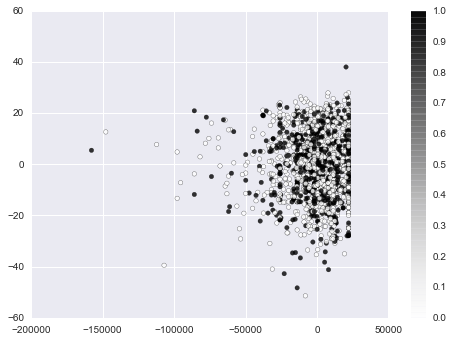

In [17]:
plt.scatter(X_trans[:,0], X_trans[:, 1], c=y, alpha = 0.8)
plt.colorbar()

In [18]:
lm = LogisticRegression()
lm.fit(X_trans,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
print cross_val_score(lm,X_trans,y,cv=10).mean()
MisClassificationError = 1 - (cross_val_score(lm,X_trans,y,cv=10).mean())
print MisClassificationError

0.657383479027
0.342616520973


In [20]:
misclass = []
for i in range(1,40):
    clf = PCA(i)
    X_trans = clf.fit_transform(X)
    MisClassificationError = 1 - (cross_val_score(lm, X_trans, y, cv=10).mean())
    misclass.append(MisClassificationError)
print min(misclass)
print np.argmin(misclass)+1

0.314108153094
37


In [21]:
#to be perfectly honest, I really don't know what the above info means
#it's from lecture 14 code (notes, not practice)... help!

In [22]:
dropped_data_dummies.corr()

,income,adults,children,client_age,type_of_eviction_Foreclosure,type_of_eviction_No-Cause,type_of_eviction_Other,language_Chinese,language_Egyptian,language_English,...,TRACTCE_613000.0,TRACTCE_613200.0,TRACTCE_613300.0,TRACTCE_613501.0,TRACTCE_613502.0,TRACTCE_613600.0,TRACTCE_613700.0,TRACTCE_613800.0,TRACTCE_613900.0,TRACTCE_614000.0
income,1.000000,0.102187,0.035520,-0.028535,0.149250,0.022391,0.029044,-0.027529,-0.016755,0.064400,...,-0.009506,0.014120,-0.027529,0.000967,0.001804,-0.011731,-0.009390,0.007670,0.000635,0.001671
adults,0.102187,1.000000,0.220458,-0.070705,0.002289,0.090921,0.065266,-0.004166,-0.004166,-0.277609,...,-0.017537,-0.020627,0.012294,0.017350,-0.004810,0.016373,-0.023815,-0.023681,-0.026239,-0.026239
children,0.035520,0.220458,1.000000,-0.333777,-0.024773,0.059673,-0.012674,-0.019881,-0.019881,-0.319734,...,-0.028124,-0.019881,-0.003120,0.086172,-0.014615,0.027307,-0.035722,0.006053,-0.015090,0.004276
client_age,-0.028535,-0.070705,-0.333777,1.000000,-0.057097,0.019589,0.014065,-0.014389,0.000455,0.161696,...,0.083331,0.050556,0.011589,-0.027636,-0.027600,0.032485,0.012738,0.020084,0.017941,-0.044233
type_of_eviction_Foreclosure,0.149250,0.002289,-0.024773,-0.057097,1.000000,-0.030471,-0.013757,-0.001028,-0.001028,0.006002,...,-0.001454,-0.001028,-0.001028,-0.002913,-0.002724,-0.002058,-0.003419,-0.002522,-0.001781,-0.001781
type_of_eviction_No-Cause,0.022391,0.090921,0.059673,0.019589,-0.030471,1.000000,-0.235299,-0.017582,-0.017582,-0.226671,...,-0.024872,-0.017582,0.033734,0.004710,0.031121,-0.035195,0.019106,-0.001169,-0.030471,-0.030471
type_of_eviction_Other,0.029044,0.065266,-0.012674,0.014065,-0.013757,-0.235299,1.000000,-0.007938,-0.007938,0.021736,...,0.047238,-0.007938,-0.007938,-0.022498,0.041558,0.025477,-0.001408,0.014324,0.033995,0.033995
language_Chinese,-0.027529,-0.004166,-0.019881,-0.014389,-0.001028,-0.017582,-0.007938,1.000000,-0.000593,-0.029637,...,-0.000839,-0.000593,-0.000593,-0.001681,-0.001572,-0.001187,-0.001973,-0.001455,-0.001028,-0.001028
language_Egyptian,-0.016755,-0.004166,-0.019881,0.000455,-0.001028,-0.017582,-0.007938,-0.000593,1.000000,-0.029637,...,-0.000839,-0.000593,-0.000593,-0.001681,-0.001572,-0.001187,-0.001973,-0.001455,-0.001028,-0.001028
language_English,0.064400,-0.277609,-0.319734,0.161696,0.006002,-0.226671,0.021736,-0.029637,-0.029637,1.000000,...,0.028311,0.020013,0.020013,-0.048819,-0.022154,0.015215,0.006515,0.028795,0.034684,0.034684
